In [1]:
!pip install -r ../requirements.txt


[notice] A new release of pip is available: 23.3.2 -> 25.0
[notice] To update, run: pip install --upgrade pip


# Data Processing and Exploratory Data Analysis

In [4]:
import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
kidney_df = pd.read_csv(
    "kidney_data.csv"
)

kidney_df.tail(10)

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
1649,1650,89,0,0,1,2,22.859626,1,12.654568,2.130131,...,8.344253,70.945313,0,0,1,2.002629,9.742499,4.646004,0,Confidential
1650,1651,32,0,0,1,3,35.253136,0,4.841773,1.037494,...,1.771158,65.378786,0,0,0,0.191474,2.812123,4.533731,1,Confidential
1651,1652,42,1,1,1,3,21.653960,0,8.735558,3.434101,...,2.524631,93.200328,0,0,0,3.738646,3.088596,1.684372,0,Confidential
1652,1653,20,0,0,1,3,20.378015,1,14.809062,7.459221,...,5.813276,63.415192,0,1,0,0.447521,0.448998,9.833712,1,Confidential
1653,1654,73,1,0,1,3,35.634449,0,8.929558,6.260773,...,4.135998,72.032441,0,0,0,2.816752,4.974069,3.448310,1,Confidential
1654,1655,90,0,0,1,2,39.677059,1,1.370151,4.157954,...,2.138976,81.102765,0,0,0,0.951836,9.547583,2.046212,0,Confidential
1655,1656,34,0,0,2,1,28.922015,0,3.372073,9.647525,...,7.911566,10.600428,0,1,0,3.604147,1.609847,0.324417,0,Confidential
1656,1657,84,0,0,2,3,21.951219,0,15.825955,7.349964,...,0.015531,69.633427,0,0,0,0.801955,5.768617,4.935108,0,Confidential
1657,1658,90,0,0,2,2,24.964149,0,12.967462,0.618614,...,3.432765,31.858023,0,0,0,0.560298,2.744519,0.322592,1,Confidential
1658,1659,34,1,1,0,0,19.253258,1,11.396510,7.446314,...,9.293499,82.314878,0,0,0,1.754852,0.186400,4.553608,1,Confidential


In [9]:
print(kidney_df.shape)

kidney_df.info()

(1659, 54)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1659 non-null   int64  
 1   Age                            1659 non-null   int64  
 2   Gender                         1659 non-null   int64  
 3   Ethnicity                      1659 non-null   int64  
 4   SocioeconomicStatus            1659 non-null   int64  
 5   EducationLevel                 1659 non-null   int64  
 6   BMI                            1659 non-null   float64
 7   Smoking                        1659 non-null   int64  
 8   AlcoholConsumption             1659 non-null   float64
 9   PhysicalActivity               1659 non-null   float64
 10  DietQuality                    1659 non-null   float64
 11  SleepQuality                   1659 non-null   float64
 12  FamilyHistoryKidneyDisease     1659 n

## Querying & Filtering the DataFrame

In [25]:
# ########################################################## #
# Query by Diet Quality --> Higher than Average Diet Quality
# ########################################################## #

print(
    kidney_df["DietQuality"].min(), kidney_df["DietQuality"].mean(), 
    kidney_df["DietQuality"].max()
)

# Retrieve all observations of patients with higher than average diet qualities
high_avg_diet = kidney_df.loc[kidney_df["DietQuality"] > kidney_df["DietQuality"].mean(), :]

# Sorting by Diet Quality with Pandas
high_avg_diet = high_avg_diet.sort_values(
    by = ["DietQuality", "BMI"],  # Primary sort = DietQuality, Secondary Sort = BMI
    ascending = False
)

print(len(high_avg_diet))

high_avg_diet.head(5)


0.0024066974290226 5.02854440376087 9.998926667050492
824


,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
530,531,76,0,3,0,0,28.918308,0,2.328057,4.307053,...,7.728682,49.728583,1,0,0,1.173581,6.611295,2.623630,1,Confidential
1241,1242,22,0,2,0,2,18.804365,0,19.082612,1.943321,...,8.253317,54.125824,0,1,0,0.888851,1.193062,2.450995,1,Confidential
1304,1305,49,0,0,0,2,24.170147,1,2.295919,6.555659,...,3.350466,95.634399,0,0,0,2.128776,3.365662,3.624931,1,Confidential
1065,1066,64,0,0,2,1,28.195184,0,2.316943,9.388921,...,6.424534,68.528323,0,0,0,2.644891,1.542890,2.469135,1,Confidential
884,885,66,1,2,2,2,18.352991,1,19.302814,1.021723,...,2.181207,91.165301,0,0,0,3.506112,9.553413,1.339884,1,Confidential


In [35]:
def extract_categorical(
    df,
    exclude_vars = "PatientID",
    include_dtypes = ["int"],
) :

    # DataFrame of Categorical features ONLY
    cat_df = df.select_dtypes(
        include = include_dtypes
    ).drop(
        columns = exclude_vars
    )

    # Coerce all features in DataFrame to Panda Categorical Types
    cat_df = cat_df.astype(
        "category"
    )

    return cat_df

In [38]:
# Subset DataFrame for Only Categorical Features
kidney_cat_df = extract_categorical(
    df = kidney_df,
    include_dtypes = ["int", "object"],
    exclude_vars = [
        "PatientID", "Age", "DoctorInCharge",
        "SystolicBP", "DiastolicBP"
    ]
)

kidney_cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Gender                         1659 non-null   category
 1   Ethnicity                      1659 non-null   category
 2   SocioeconomicStatus            1659 non-null   category
 3   EducationLevel                 1659 non-null   category
 4   Smoking                        1659 non-null   category
 5   FamilyHistoryKidneyDisease     1659 non-null   category
 6   FamilyHistoryHypertension      1659 non-null   category
 7   FamilyHistoryDiabetes          1659 non-null   category
 8   PreviousAcuteKidneyInjury      1659 non-null   category
 9   UrinaryTractInfections         1659 non-null   category
 10  ACEInhibitors                  1659 non-null   category
 11  Diuretics                      1659 non-null   category
 12  Statins                        165

## Calculating Correlation (Cramer's V) for Categorical Features

In [46]:
from scipy.stats import chi2_contingency

# Contingency table to hold our correlations
def calculate_cramers(
    df
) :
    column_names = df.columns
    cramers_v_df = pd.DataFrame(
        index = column_names,
        columns = column_names
    )
    # Calculate pairwise associations between Categorical features
    for var1 in column_names :
        for var2 in column_names : 
            if( var1 == var2 ) :
                cramers_v_df.loc[var1, var2] = 1.0
            else :
                freq_table = pd.crosstab(df[var1], df[var2])  # Frequency table
                n = freq_table.sum().sum()  # Total sample size
                chi_stat = chi2_contingency(freq_table)[0]  # Chi-Squared Result
                phi = chi_stat / n
                nrow, ncol = freq_table.shape
                phi_cov = max( 0, phi - ((nrow - 1) * (ncol - 1)) / (n - 1) )
                row_var = nrow - ((nrow - 1)**2) / (n - 1)
                col_var = ncol - ((ncol - 1)**2) / (n - 1)
                cramers_v = np.sqrt(
                    phi_cov / min( 
                        (row_var - 1), (col_var - 1) 
                        )
                    )
                cramers_v_df.loc[var1, var2] = round(cramers_v, 3)

    return cramers_v_df.astype(float)


# Calculate for Cramer's V for Categorical Features
cramers_df = calculate_cramers(
    df = kidney_cat_df
)

cramers_df

,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,Smoking,FamilyHistoryKidneyDisease,FamilyHistoryHypertension,FamilyHistoryDiabetes,PreviousAcuteKidneyInjury,UrinaryTractInfections,ACEInhibitors,Diuretics,Statins,AntidiabeticMedications,Edema,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,Diagnosis
Gender,1.000,0.000,0.000,0.000,0.000,0.019,0.000,0.000,0.027,0.000,0.000,0.055,0.000,0.005,0.000,0.000,0.000,0.000,0.032
Ethnicity,0.000,1.000,0.027,0.017,0.016,0.000,0.000,0.000,0.047,0.000,0.000,0.000,0.000,0.028,0.000,0.045,0.011,0.078,0.000
SocioeconomicStatus,0.000,0.027,1.000,0.021,0.050,0.024,0.000,0.042,0.000,0.000,0.000,0.057,0.000,0.000,0.000,0.026,0.000,0.000,0.025
EducationLevel,0.000,0.017,0.021,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.029,0.000,0.041,0.000,0.000,0.041
Smoking,0.000,0.016,0.050,0.000,1.000,0.000,0.000,0.037,0.000,0.000,0.000,0.000,0.000,0.000,0.028,0.000,0.000,0.000,0.000
FamilyHistoryKidneyDisease,0.019,0.000,0.024,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.051,0.011,0.021,0.004,0.015,0.041
FamilyHistoryHypertension,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.029,0.016,0.000,0.000,0.000,0.000,0.000,0.000,0.027,0.000
FamilyHistoryDiabetes,0.000,0.000,0.042,0.000,0.037,0.000,0.000,1.000,0.000,0.034,0.020,0.000,0.000,0.000,0.000,0.000,0.000,0.015,0.000
PreviousAcuteKidneyInjury,0.027,0.047,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.036,0.000,0.000,0.000,0.000
UrinaryTractInfections,0.000,0.000,0.000,0.000,0.000,0.000,0.029,0.034,0.000,1.000,0.000,0.000,0.044,0.023,0.000,0.000,0.000,0.049,0.020


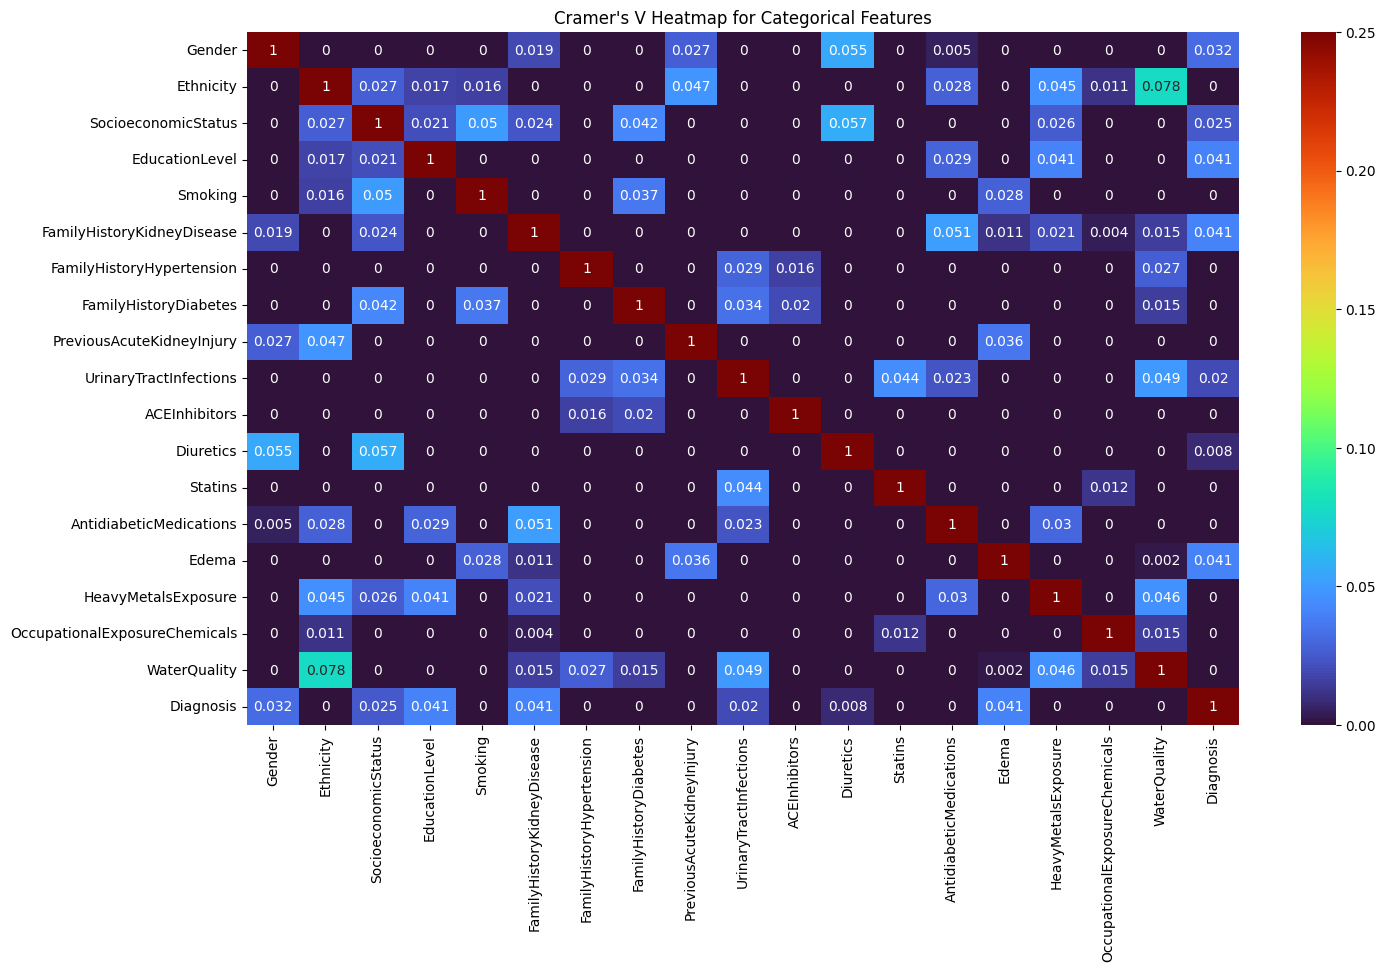

In [52]:
fig, ax = plt.subplots(
    figsize = (16, 9)
)

sns.heatmap(
    cramers_df,
    ax = ax,
    cmap = "turbo",
    vmin = 0.0,
    vmax = 0.25,
    annot = True,
)

ax.set_title(
    "Cramer's V Heatmap for Categorical Features"
)

fig.savefig(
    "Cramers_V.png",
    bbox_inches = "tight",
    dpi = 750
)

## Investigating Numeric Features

In [57]:
# Categorical list of features
cat_list = kidney_cat_df.columns.tolist()
cat_list.append("PatientID")
cat_list.append("DoctorInCharge")
cat_list

# Numeric DataFrame
kidney_num_df = kidney_df.drop(
    columns = cat_list
)
kidney_num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          1659 non-null   int64  
 1   BMI                          1659 non-null   float64
 2   AlcoholConsumption           1659 non-null   float64
 3   PhysicalActivity             1659 non-null   float64
 4   DietQuality                  1659 non-null   float64
 5   SleepQuality                 1659 non-null   float64
 6   SystolicBP                   1659 non-null   int64  
 7   DiastolicBP                  1659 non-null   int64  
 8   FastingBloodSugar            1659 non-null   float64
 9   HbA1c                        1659 non-null   float64
 10  SerumCreatinine              1659 non-null   float64
 11  BUNLevels                    1659 non-null   float64
 12  GFR                          1659 non-null   float64
 13  ProteinInUrine    

In [58]:
num_corr_df = kidney_num_df.corr()
num_corr_df

,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,FastingBloodSugar,HbA1c,...,CholesterolTriglycerides,NSAIDsUse,FatigueLevels,NauseaVomiting,MuscleCramps,Itching,QualityOfLifeScore,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy
Age,1.000000,-0.033202,-0.006030,0.003485,0.004062,-0.005151,0.050918,0.007282,-0.006815,0.026093,...,-0.021061,0.019042,0.002977,-0.029556,0.001318,0.005683,-0.022676,-0.015165,0.043168,0.010920
BMI,-0.033202,1.000000,-0.067239,0.003528,0.014539,0.011668,-0.017086,0.020390,0.022776,0.023096,...,0.040651,-0.003156,0.009345,0.023334,-0.030355,0.023998,-0.046046,0.002934,0.020329,-0.015661
AlcoholConsumption,-0.006030,-0.067239,1.000000,0.056835,-0.026931,0.025684,0.025550,-0.030295,-0.006975,0.011396,...,0.008030,-0.017272,-0.041375,0.021581,-0.008730,0.018152,0.000959,0.022099,0.011002,-0.012806
PhysicalActivity,0.003485,0.003528,0.056835,1.000000,0.028995,0.027778,-0.002123,-0.003686,0.008377,-0.018307,...,-0.009947,0.023746,0.014802,-0.024660,0.035289,-0.011907,0.006563,-0.017973,0.059385,0.007185
DietQuality,0.004062,0.014539,-0.026931,0.028995,1.000000,-0.001167,0.018914,-0.032950,0.010676,-0.003114,...,-0.000174,0.010630,-0.004170,-0.013537,0.040590,-0.041057,-0.008491,0.035851,-0.045941,-0.014740
SleepQuality,-0.005151,0.011668,0.025684,0.027778,-0.001167,1.000000,-0.024671,-0.014668,-0.050340,-0.008219,...,-0.023590,0.002088,0.032695,0.053687,0.004537,-0.005265,0.007986,0.003318,-0.007660,0.035393
SystolicBP,0.050918,-0.017086,0.025550,-0.002123,0.018914,-0.024671,1.000000,-0.022278,-0.046875,-0.025624,...,-0.001697,-0.001205,-0.001497,0.002677,0.011400,-0.015591,0.029407,-0.040960,0.003990,-0.015852
DiastolicBP,0.007282,0.020390,-0.030295,-0.003686,-0.032950,-0.014668,-0.022278,1.000000,-0.006918,0.005149,...,0.013657,-0.003046,-0.022700,0.016192,-0.000438,0.005802,-0.026415,-0.009208,0.025991,-0.023225
FastingBloodSugar,-0.006815,0.022776,-0.006975,0.008377,0.010676,-0.050340,-0.046875,-0.006918,1.000000,0.045503,...,0.027812,-0.015878,0.017620,0.016942,-0.004482,-0.014312,0.049155,-0.018368,-0.021860,0.015248
HbA1c,0.026093,0.023096,0.011396,-0.018307,-0.003114,-0.008219,-0.025624,0.005149,0.045503,1.000000,...,-0.017894,0.030609,0.016595,0.019688,0.011800,-0.010437,0.048349,-0.022492,-0.000788,-0.007841


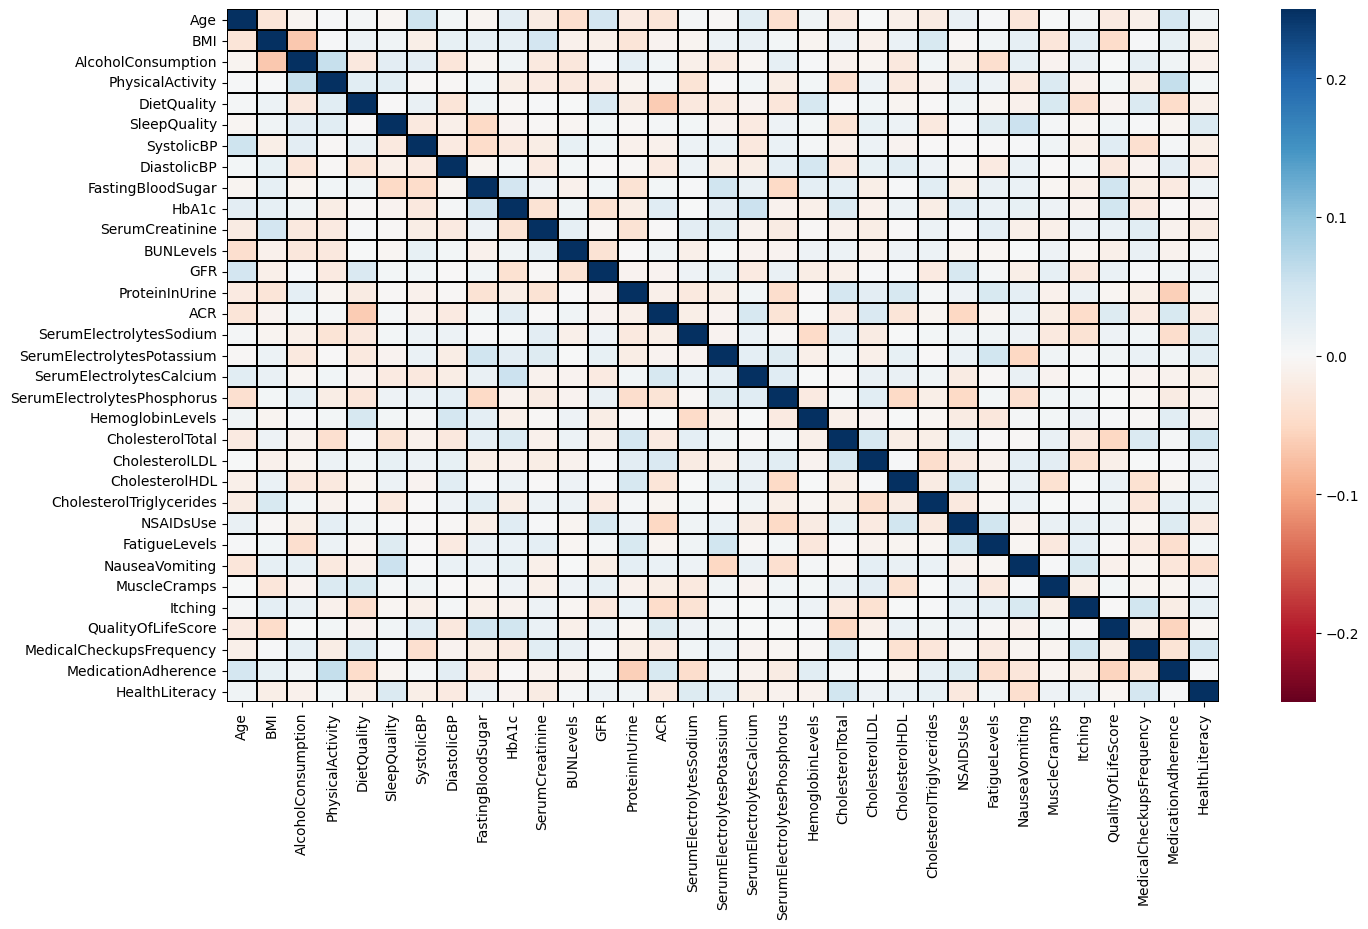

In [71]:
fig, ax = plt.subplots(
    figsize = (16, 9)
)

sns.heatmap(
    num_corr_df,
    ax = ax,
    cmap = "RdBu",
    vmin = -0.25,
    vmax = 0.25,
    linewidths = 0.004,
    linecolor = "black"
)

fig.savefig(
    "numeric_correlation.png",
    bbox_inches = "tight",
    dpi = 900,
)